# Import libraries

In [1]:
###Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

np.random.seed(42) # how to define random seed
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras.layers import Dense, Input


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import Lasso

import tensorflow as tf
from tensorflow.keras import layers
import logging
tf.get_logger().setLevel(logging.ERROR)
import warnings 
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense, Dropout, Activation, Flatten



import os

import time

2023-04-09 22:39:47.783918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Process data

### Data Cleaning

In [2]:
predata = pd.read_csv('1.csv') 
print('Import: ', predata.shape)
predata = predata.dropna() # drop rows with missing values
print('Drop NA: ', predata.shape)
display(predata)

Import:  (16288, 13)
Drop NA:  (16273, 13)


,id,host_id,host_is_superhost,neighbourhood_cleansed,property_type,accommodates,bathrooms,bedrooms,beds,bed_type,cancellation_policy,review_scores_rating,price
0,2634250,11790218,0,1,1,6,3.0,3.0,3.0,1,3,100,1490
1,14807246,85237033,0,9,1,5,1.0,2.0,3.0,1,2,100,1503
2,15321132,24254303,0,12,1,2,1.0,1.0,1.0,1,3,100,248
3,15423684,98854995,0,1,1,3,1.0,1.0,1.0,1,3,100,356
4,15442769,87432646,0,2,1,4,1.0,2.0,2.0,1,3,100,698
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16283,24639758,160411460,0,10,16,2,1.0,1.0,1.0,1,3,100,396
16284,25329682,172283022,0,12,16,3,1.0,1.0,2.0,1,3,100,664
16285,29607257,184577485,0,13,16,10,5.0,5.0,8.0,1,1,100,1678
16286,31446572,234377747,0,10,16,6,2.0,3.0,3.0,1,3,100,1684


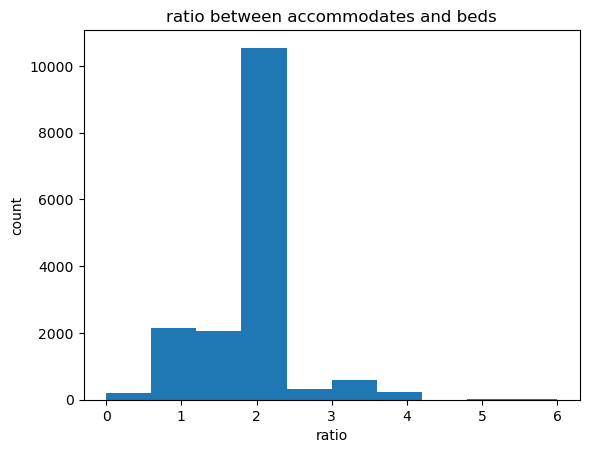

(15904, 14)


In [3]:

predata['ratio'] = predata['accommodates']/predata['beds']
# plot ratio
plt.hist(predata['ratio'], bins=10, range=(0, 6))
plt.xlabel('ratio')
plt.ylabel('count')
plt.title('ratio between accommodates and beds')
plt.show()
# delete the ratio between 1 and 5
predata = predata[predata['ratio'] <= 5]
predata = predata[predata['ratio'] >= 1]
print(predata.shape) 
 

(15904, 14)
68983


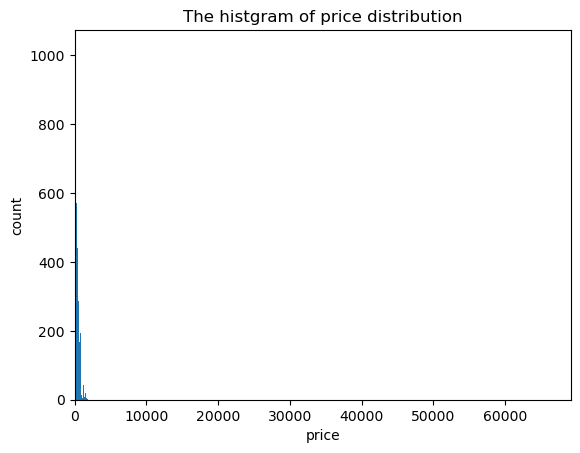

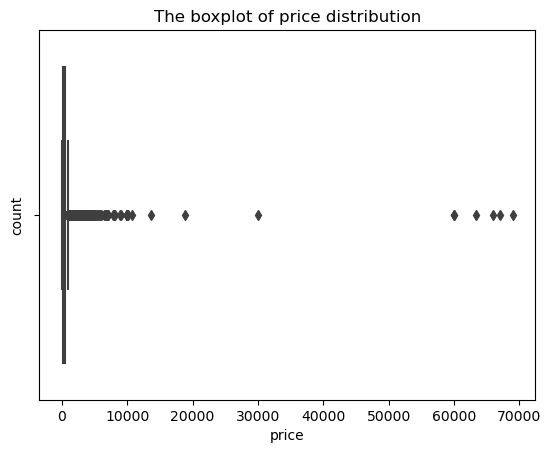

max_price: 68983
Abnormal data: (61, 14) After deletion data shape: (15843, 14)
Mean: 463.32998800732184
Standard deviation: 435.57838969630217
Max bedrooms:  11.0
Max accomodates:  16
Max beds:  16.0


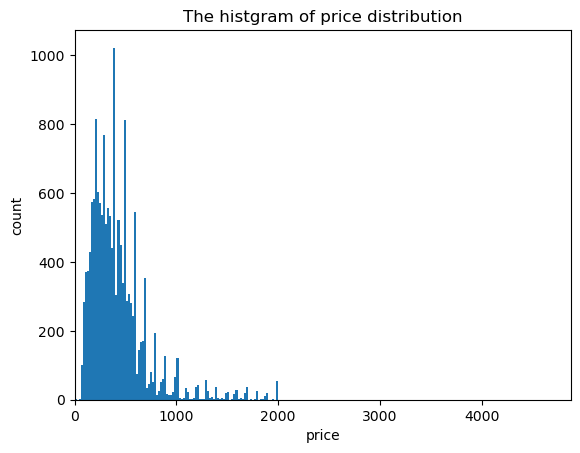

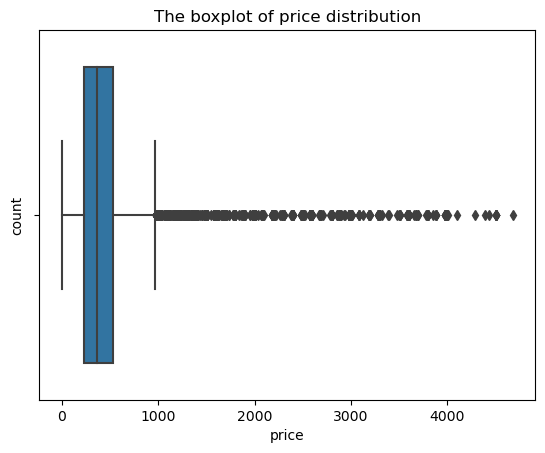

max_price: 4677
Abnormal data: (370, 14) After deletion data shape: (15473, 14)
Mean: 411.48471531054093
Standard deviation: 258.86674544504376
Max bedrooms:  10.0
Max accomodates:  16
Max beds:  16.0


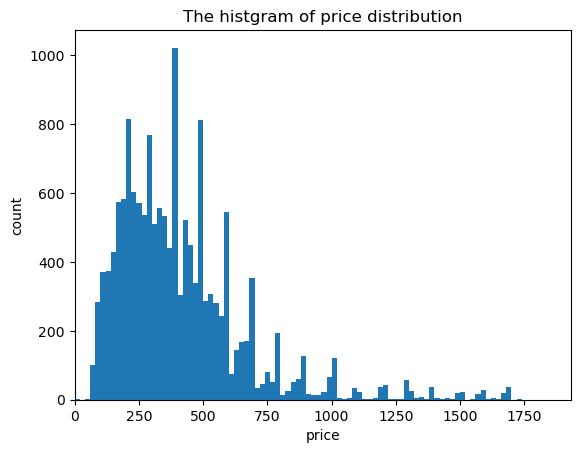

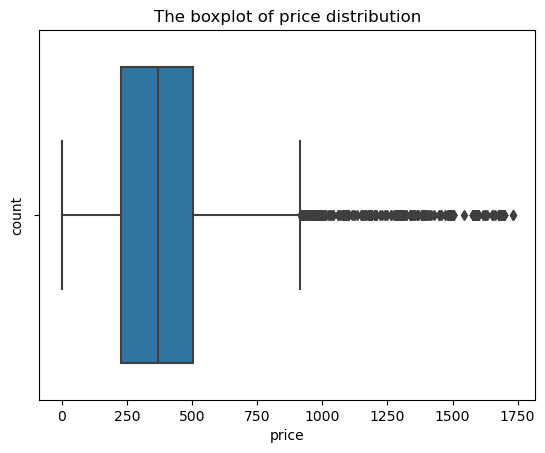

max_price: 1731
Abnormal data: (349, 14) After deletion data shape: (15124, 14)
Mean: 387.9383760909812
Standard deviation: 208.15346758902035
Max bedrooms:  10.0
Max accomodates:  16
Max beds:  16.0


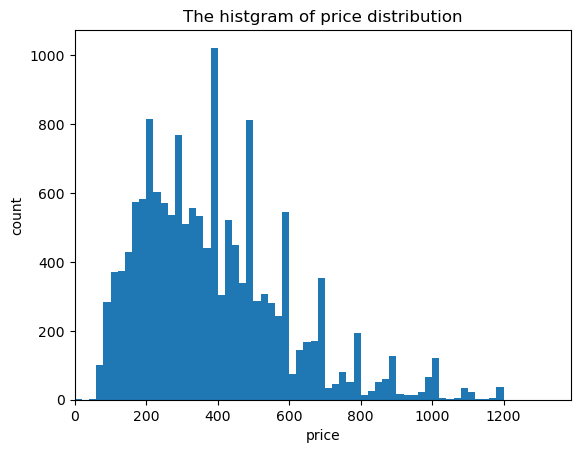

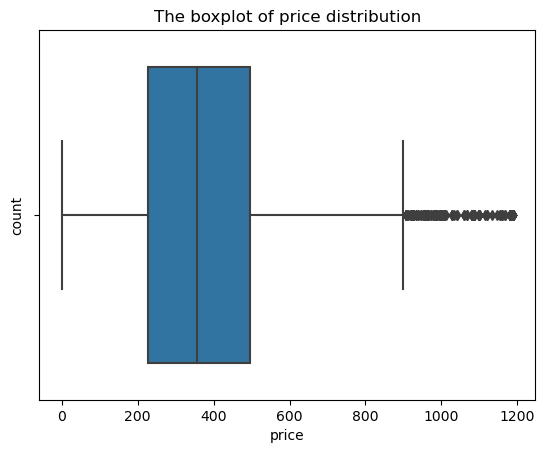

max_price: 1188
Abnormal data: (113, 14) After deletion data shape: (15011, 14)
Mean: 382.41509559656254
Standard deviation: 198.87517076529454
Max bedrooms:  10.0
Max accomodates:  16
Max beds:  16.0


In [4]:

data = predata.copy()
print(data.shape)
print(max(data['price']))

for i in range(4):
    
    # plot hist and boxplot
    plt.hist(data['price'], bins=100, range=(0, 2000))
    plt.xlim(0, max(data['price'])+200)
    plt.xlabel('price')
    plt.ylabel('count')
    plt.title('The histgram of price distribution')
    plt.show()
    sns.boxplot(x=data['price'])
    plt.xlabel('price')
    plt.ylabel('count')
    plt.title('The boxplot of price distribution')
    plt.show()

    print("max_price:",max(data['price']))
    # before deletion of mean and std
    price_mean1 = data['price'].mean()
    price_std1 = data['price'].std()
    outliers = data[(data['price'] > price_mean1 + 3 * price_std1) | (data['price'] < price_mean1 - 3 * price_std1)]
    # delete
    data = data[(data['price'] <= price_mean1 + 3 * price_std1) & (data['price'] >= price_mean1 - 3 * price_std1)]
    print('Abnormal data:',outliers.shape,'After deletion data shape:', data.shape)
    # after deletion
    price_mean2 = data['price'].mean()
    price_std2 = data['price'].std()
    # new mean and std
    print('Mean:', price_mean2)
    print('Standard deviation:', price_std2)

    print('Max bedrooms: ', max(data['bedrooms']))
    print('Max accomodates: ', max(data['accommodates']))
    print('Max beds: ', max(data['beds']))

MyData = data.copy()


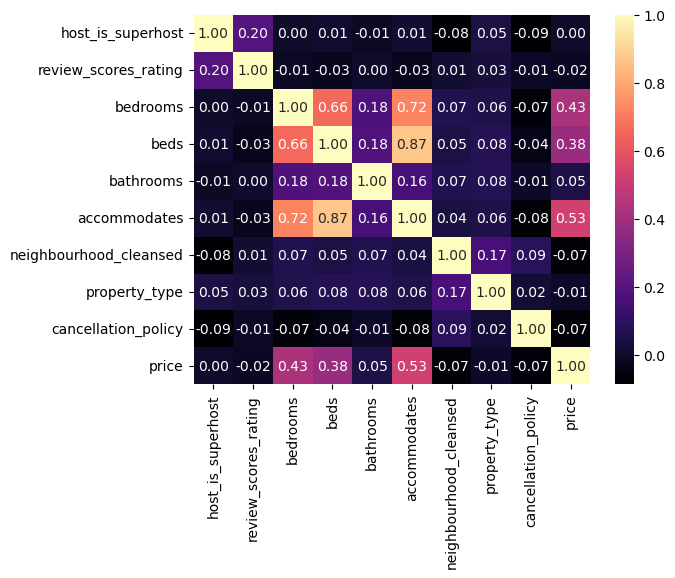

In [5]:

sns.heatmap(MyData[['host_is_superhost', 'review_scores_rating', 'bedrooms', 'beds', 'bathrooms', 'accommodates', 'neighbourhood_cleansed', 
                    'property_type', 'cancellation_policy', 'price']].corr(), 
                    annot=True, fmt='.2f', cmap='magma')

plt.show()



In [6]:

# Features = data.drop(['price', 'id', 'host_id'], axis=1)
# Features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'property_type', 'review_scores_rating', 'host_is_superhost', 'neighbourhood_cleansed', 'cancellation_policy']
Features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'host_is_superhost']

X = MyData.loc[:,Features]
y = MyData.loc[:,'price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

display(Xtrain.head(5))
display(Xtest.head(5))
display(ytrain.head(5))
display(ytest.head(5))


### head of rating around 100! 

(10507, 6) (4504, 6) (10507,) (4504,)


,accommodates,bathrooms,bedrooms,beds,review_scores_rating,host_is_superhost
14337,1,2.0,1.0,1.0,80,0
11279,2,1.0,1.0,1.0,100,0
12700,2,1.0,1.0,1.0,100,0
7473,2,1.0,1.0,1.0,98,0
12677,2,1.0,0.0,1.0,100,0


,accommodates,bathrooms,bedrooms,beds,review_scores_rating,host_is_superhost
3299,2,1.0,1.0,1.0,90,0
12716,4,1.0,2.0,2.0,100,1
9869,1,0.5,1.0,1.0,85,0
1007,2,1.0,1.0,1.0,100,0
8262,2,1.0,1.0,1.0,95,0


14337    101
11279    356
12700    188
7473     255
12677    248
Name: price, dtype: int64

3299     201
12716    637
9869     101
1007     289
8262     336
Name: price, dtype: int64

In [7]:
### standardize the data
scaler = StandardScaler()
Xtrain_std = scaler.fit_transform(Xtrain)
Xtest_std = scaler.transform(Xtest)

print(Xtrain_std)


[[-1.16781603  2.20338458 -0.38402484 -0.61821508 -1.48078853 -0.62950701]
 [-0.5967086  -0.24684157 -0.38402484 -0.61821508  0.51135553 -0.62950701]
 [-0.5967086  -0.24684157 -0.38402484 -0.61821508  0.51135553 -0.62950701]
 ...
 [ 0.54550624 -0.24684157  0.97591753  0.29768817  0.51135553 -0.62950701]
 [ 7.39879532 16.90474148  9.1355718   8.54081741  0.51135553 -0.62950701]
 [-0.5967086  -0.24684157 -1.74396722 -0.61821508  0.21253392 -0.62950701]]


# Machine Learning Models

## Linear Regression

In [8]:

LRmodel1 = LinearRegression()
cv_method = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
para_LR1 = {'fit_intercept': [True, False],'positive': [True, False]}
grid_LR1 = GridSearchCV(LRmodel1, para_LR1, scoring='neg_mean_squared_error', cv=cv_method, verbose=1)
# grid_LR = GridSearchCV(LRmodel1, para_LR, cv=5, scoring='r2')  # r2, accuracy, precision, recall, f1, roc_auc
grid_LR1.fit(Xtrain_std, ytrain)
print(grid_LR1.best_params_)
print(grid_LR1.best_score_)

LRmodel1_best = grid_LR1.best_estimator_      # 'fit_intercept': True, 'positive': False
# LRmodel1_best = best_model
LRmodel1_best.fit(Xtrain_std, ytrain)
ypred_LR1 = LRmodel1_best.predict(Xtest_std)

mseLR1 = mean_squared_error(ytest, ypred_LR1)
r2LR1 = r2_score(ytest, ypred_LR1)
maeLR1 = mean_absolute_error(ytest, ypred_LR1)
rmseLR1 = np.sqrt(mean_squared_error(ytest, ypred_LR1))
corrLR1,_ = pearsonr(ytest, ypred_LR1)
# mapeLR1 = np.mean(np.abs((ytest - ypred_LR1) / ytest)) *100

def mape(ytest, ypred_LR1):
    """计算MAPE"""
    mask = ytest != 0
    relative_errors = np.abs((ytest[mask] - ypred_LR1[mask]) / ytest[mask])
    relative_errors[np.isnan(relative_errors)] = 0
    return np.mean(relative_errors) * 100

mapeLR1 = mape(ytest, ypred_LR1)

print('MSE:', mseLR1, 'MAE:', maeLR1, 'RMSE:', rmseLR1, 'R2:', r2LR1, 'Corr:', corrLR1, 'MAPE:', mapeLR1)



Fitting 15 folds for each of 4 candidates, totalling 60 fits
{'fit_intercept': True, 'positive': False}
-27044.541002203205
MSE: 29398.078339334985 MAE: 127.94224737243533 RMSE: 171.45867822695644 R2: 0.2844176555803559 Corr: 0.5355192019187567 MAPE: 47.953146958408574


## Logistic Regression

In [9]:


LRmodel2 = LogisticRegression()
cv_method = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
para_LR2 = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_LR2 = GridSearchCV(LRmodel2, para_LR2, scoring='neg_mean_squared_error', cv=cv_method, verbose=1)
# grid_LR = GridSearchCV(LRmodel1, para_LR, cv=5, scoring='r2')  # r2, accuracy, precision, recall, f1, roc_auc
grid_LR2.fit(Xtrain_std, ytrain)
print(grid_LR2.best_params_)
print(grid_LR2.best_score_)

LRmodel2_best = LogisticRegression(C=10, penalty='l2')
LRmodel2_best.fit(Xtrain_std, ytrain)
ypred_LR2 = LRmodel2_best.predict(Xtest_std)
mseLR2 = mean_squared_error(ytest, ypred_LR2)
r2LR2 = r2_score(ytest, ypred_LR2)
maeLR2 = mean_absolute_error(ytest, ypred_LR2)
rmseLR2 = np.sqrt(mean_squared_error(ytest, ypred_LR2))
corrLR2,_ = pearsonr(ytest, ypred_LR2)

def mape(ytest, ypred_LR2):
    """计算MAPE"""
    mask = ytest != 0
    relative_errors = np.abs((ytest[mask] - ypred_LR2[mask]) / ytest[mask])
    relative_errors[np.isnan(relative_errors)] = 0
    return np.mean(relative_errors) * 100

mapeLR2 = mape(ytest, ypred_LR2)

print('MSE:', mseLR2, 'MAE:', maeLR2, 'RMSE:', rmseLR2, 'R2:', r2LR2, 'Corr:', corrLR2, 'MAPE:', mapeLR2 )

Fitting 15 folds for each of 6 candidates, totalling 90 fits
{'C': 0.1, 'penalty': 'l2'}
-35223.75883909207
MSE: 36951.11456483126 MAE: 137.2797513321492 RMSE: 192.2267269784076 R2: 0.1005682451753428 Corr: 0.5303966166623998 MAPE: 39.68862235891121


## Decision Tree

In [15]:

DTmodel = DecisionTreeRegressor()
cv_method = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
para_DT = {'max_depth': [2, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_DT = GridSearchCV(DTmodel, para_DT, scoring='neg_mean_squared_error', cv=cv_method, verbose=1)
# grid_LR = GridSearchCV(LRmodel1, para_LR, cv=5, scoring='r2')  # r2, accuracy, precision, recall, f1, roc_auc
grid_DT.fit(Xtrain_std, ytrain)
print(grid_DT.best_params_)
print(grid_DT.best_score_)

DTmodel_best = grid_DT.best_estimator_
DTmodel_best.fit(Xtrain_std, ytrain)
ypred_DT = DTmodel_best.predict(Xtest_std)
mseDT = mean_squared_error(ytest, ypred_DT)
r2DT = r2_score(ytest, ypred_DT)
maeDT = mean_absolute_error(ytest, ypred_DT)
rmseDT = np.sqrt(mean_squared_error(ytest, ypred_DT))
corrDT,_ = pearsonr(ytest, ypred_DT)

def mape(ytest, ypred_DT):
    """计算MAPE"""
    mask = ytest != 0
    relative_errors = np.abs((ytest[mask] - ypred_DT[mask]) / ytest[mask])
    relative_errors[np.isnan(relative_errors)] = 0
    return np.mean(relative_errors) * 100

mapeDT = mape(ytest, ypred_DT)

print('MSE:', mseDT, 'MAE:', maeDT, 'RMSE:', rmseDT, 'R2:', r2DT, 'Corr:', corrDT, 'MAPE:', mapeDT)

Fitting 15 folds for each of 27 candidates, totalling 405 fits
{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
-24403.5242274868
MSE: 25021.663228772188 MAE: 120.28526934883375 RMSE: 158.18237331881258 R2: 0.3909445295080253 Corr: 0.6258394366544751 MAPE: 42.19367777123057


## Lasso Regression

In [14]:

LassoModel = Lasso()
cv_method = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
para_Lasso = {'alpha': [0.1, 1, 10], 'fit_intercept': [True, False], 'positive': [True, False]}
grid_Lasso = GridSearchCV(LassoModel, para_Lasso, scoring='neg_mean_squared_error', cv=cv_method, verbose=1)
# grid_LR = GridSearchCV(LRmodel1, para_LR, cv=5, scoring='r2')  # r2, accuracy, precision, recall, f1, roc_auc
grid_Lasso.fit(Xtrain_std, ytrain)
print(grid_Lasso.best_params_)
print(grid_Lasso.best_score_)
LassoModel_best = grid_Lasso.best_estimator_
LassoModel_best.fit(Xtrain_std, ytrain)
ypred_Lasso = LassoModel_best.predict(Xtest_std)
mseLasso = mean_squared_error(ytest, ypred_Lasso)
r2Lasso = r2_score(ytest, ypred_Lasso)
maeLasso = mean_absolute_error(ytest, ypred_Lasso)
rmseLasso = np.sqrt(mean_squared_error(ytest, ypred_Lasso))
corrLasso,_ = pearsonr(ytest, ypred_Lasso)

def mape(ytest, ypred_Lasso):
    """计算MAPE"""
    mask = ytest != 0
    relative_errors = np.abs((ytest[mask] - ypred_Lasso[mask]) / ytest[mask])
    relative_errors[np.isnan(relative_errors)] = 0
    return np.mean(relative_errors) * 100

mapeLasso = mape(ytest, ypred_Lasso)

print('MSE:', mseLasso, 'MAE:', maeLasso, 'RMSE:', rmseLasso, 'R2:', r2Lasso, 'Corr:', corrLasso, 'MAPE:', mapeLasso)

Fitting 15 folds for each of 12 candidates, totalling 180 fits
{'alpha': 0.1, 'fit_intercept': True, 'positive': False}
-27044.423104461075
MSE: 29376.569670855133 MAE: 127.95329971044039 RMSE: 171.39594414937343 R2: 0.28494120080118646 Corr: 0.5358448250389818 MAPE: 47.983442892719495


## Random Forest

In [13]:

RFmodel = RandomForestRegressor()
cv_method = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
para_RF = {'n_estimators': [10, 50, 100], 'max_depth': [2, 5, 10], 'min_samples_split': [2, 50]}
grid_RF = GridSearchCV(RFmodel, para_RF, scoring='neg_mean_squared_error', cv=cv_method, verbose=1)
# grid_LR = GridSearchCV(LRmodel1, para_LR, cv=5, scoring='r2')  # r2, accuracy, precision, recall, f1, roc_auc
grid_RF.fit(Xtrain_std, ytrain)
print(grid_RF.best_params_)
print(grid_RF.best_score_)

RFmodel_best = grid_RF.best_estimator_
RFmodel_best.fit(Xtrain_std, ytrain)
ypred_RF = RFmodel_best.predict(Xtest_std)
mseRF = mean_squared_error(ytest, ypred_RF)
r2RF = r2_score(ytest, ypred_RF)
maeRF = mean_absolute_error(ytest, ypred_RF)
rmseRF = np.sqrt(mean_squared_error(ytest, ypred_RF))
corrRF,_ = pearsonr(ytest, ypred_RF)

def mape(ytest, ypred_RF):
    """计算MAPE"""
    mask = ytest != 0
    relative_errors = np.abs((ytest[mask] - ypred_RF[mask]) / ytest[mask])
    relative_errors[np.isnan(relative_errors)] = 0
    return np.mean(relative_errors) * 100

mapeRF = mape(ytest, ypred_RF)

print('MSE:', mseRF, 'MAE:', maeRF, 'RMSE:', rmseRF, 'R2:', r2RF, 'Corr:', corrRF, 'MAPE:', mapeRF)

Fitting 15 folds for each of 18 candidates, totalling 270 fits
{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
-24142.079301423375
MSE: 24657.63346741001 MAE: 119.69796919742136 RMSE: 157.02749271197706 R2: 0.39980542398783636 Corr: 0.6335587323431233 MAPE: 42.17279883759616


## Gradient Boosting

In [16]:
### use gradient boosting to predict the price， based on decision tree

GBmodel = GradientBoostingRegressor()
cv_method = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
para_GB = {'n_estimators': [10, 100], 'max_depth': [2, 5], 'learning_rate': [0.01, 0.1], 'max_features': [0.5, 0.8], 'min_samples_split': [2, 5]}
grid_GB = GridSearchCV(GBmodel, para_GB, scoring='neg_mean_squared_error', cv=cv_method, verbose=1)
# grid_LR = GridSearchCV(LRmodel1, para_LR, cv=5, scoring='r2')  # r2, accuracy, precision, recall, f1, roc_auc
grid_GB.fit(Xtrain_std, ytrain)
print(grid_GB.best_params_)
print(grid_GB.best_score_)
GBmodel_best = grid_GB.best_estimator_
GBmodel_best.fit(Xtrain_std, ytrain)
ypred_GB = GBmodel_best.predict(Xtest_std)
mseGB = mean_squared_error(ytest, ypred_GB)
r2GB = r2_score(ytest, ypred_GB)
maeGB = mean_absolute_error(ytest, ypred_GB)
rmseGB = np.sqrt(mean_squared_error(ytest, ypred_GB))
corrGB,_ = pearsonr(ytest, ypred_GB)

def mape(ytest, ypred_GB):
    """计算MAPE"""
    mask = ytest != 0
    relative_errors = np.abs((ytest[mask] - ypred_GB[mask]) / ytest[mask])
    relative_errors[np.isnan(relative_errors)] = 0
    return np.mean(relative_errors) * 100

mapeGB = mape(ytest, ypred_GB)

print('MSE:', mseGB, 'MAE:', maeGB, 'RMSE:', rmseGB, 'R2:', r2GB, 'Corr:', corrGB, 'MAPE:', mapeGB)

Fitting 15 folds for each of 32 candidates, totalling 480 fits
{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 100}
-24207.618936116694
MSE: 24506.53189332839 MAE: 119.14624234550188 RMSE: 156.54562240231564 R2: 0.40348340652052983 Corr: 0.6357570241439535 MAPE: 41.86123538996303


# DNN

In [10]:
# # TrainFrac = 0.8
# # RandomSeed = np.random.randint(low=21, high=22)
# CheckPointMethod = 'val_loss'
# RegularizationFactor = 0.0001
# ActivationMethod = 'relu', 'leakyrelu', 'tanh', 'sigmoid'
# DropoutValue = [0.5, 0.5, 0.5, 0.3, 0.3, 0.3, 0.2, 0, 0] # dropout value for each layer
# OutputLayerActMethod = 'linear'
LossMethod = 'mean_absolute_error'
# LearnDecay = 0.0005
# FitEpoch = 200
# BestEpochOptMethod = 'adam' #optimizer
# c = [0.001, 0.005, 0.01] #different learning rate for testing  ## i
# d = [ [64, 128, 256, 512, 512, 1024, 1024, 1024, 1024] ]    # no of neuron per layer ## n 

In [11]:
def MyDNN(hidden_neuron = 64, learning_rate =0.01, optimizer = 'adam', l2= 0.001):
    MyDNN = keras.Sequential()

    MyDNN.add(layers.Dense(units=hidden_neuron, input_shape = (Xtrain_std.shape[1],), kernel_regularizer=keras.regularizers.l2(0.01)) )
    MyDNN.add(Dropout(0.5))
    MyDNN.add(LeakyReLU(alpha=0.3))

    MyDNN.add(layers.Dense(units=hidden_neuron, kernel_regularizer=keras.regularizers.l2(0.01)))
    MyDNN.add(Dropout(0.5))
    MyDNN.add(LeakyReLU(alpha=0.3))

    MyDNN.add(layers.Dense(units=hidden_neuron, kernel_regularizer=keras.regularizers.l2(0.01)))
    MyDNN.add(Dropout(0.5))
    MyDNN.add(LeakyReLU(alpha=0.3))

    MyDNN.add(layers.Dense(units=hidden_neuron, kernel_regularizer=keras.regularizers.l2(0.01)))
    MyDNN.add(Dropout(0.3))
    MyDNN.add(LeakyReLU(alpha=0.3))

    MyDNN.add(layers.Dense(units=hidden_neuron, kernel_regularizer=keras.regularizers.l2(0.01)))
    MyDNN.add(Dropout(0.3))
    MyDNN.add(LeakyReLU(alpha=0.3))

    MyDNN.add(layers.Dense(units=hidden_neuron, kernel_regularizer=keras.regularizers.l2(0.01)))
    MyDNN.add(Dropout(0.3))
    MyDNN.add(LeakyReLU(alpha=0.3))

    MyDNN.add(layers.Dense(units=hidden_neuron, kernel_regularizer=keras.regularizers.l2(0.01)))
    MyDNN.add(Dropout(0.2))
    MyDNN.add(LeakyReLU(alpha=0.3))

    MyDNN.add(layers.Dense(units=hidden_neuron, kernel_regularizer=keras.regularizers.l2(0.01)))
    MyDNN.add(Dropout(0))
    MyDNN.add(LeakyReLU(alpha=0.3))
    
    MyDNN.add(layers.Dense(units=hidden_neuron, kernel_regularizer=keras.regularizers.l2(0.01)))
    MyDNN.add(Dropout(0))
    MyDNN.add(LeakyReLU(alpha=0.3))
        
    MyDNN.add(layers.Dense(units=1, activation='linear'))
  
    # sgd = keras.optimizers.SGD(lr = learning_rate)
    MyDNN.compile(loss=LossMethod, optimizer=optimizer)
    # adam = keras.optimizers.Adam(learning_rate=0.001, decay=0.0005)
    # MyDNN.compile(loss=LossMethod, optimizer='adam')
    # MyDNN.fit(Xtrain_std, ytrain, epochs=50, batch_size= 32, verbose=0)
    return MyDNN


# def my_leakyrelu(x):
#     return LeakyReLU(alpha=0.3)(x)
# LeakyReLU = my_leakyrelu
para_grid = dict(learning_rate = [0.001, 0.005, 0.01], 
                 hidden_neuron = [32, 64], 
                #  activation=['relu', 'leakyrelu','sigmoid'], 
                #  batch_size = [32, 64], 
                 optimizer = ['adam', 'sgd'], 
                #  l2=[0.001, 0.01, 0.1]
                )

dnn_model = KerasRegressor(build_fn=MyDNN, epochs = 200, verbose=0)
    # define grid search
grid = GridSearchCV(estimator = dnn_model, param_grid=para_grid, n_jobs=-1, cv=3)
    # execute the grid search
grid_result = grid.fit(Xtrain_std, ytrain)
    # summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# use the best model to predict


2023-04-09 23:16:54.727409: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 23:16:54.727417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-09 23:16:54.727412: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorF

Best: -118.824913 using {'hidden_neuron': 64, 'learning_rate': 0.001, 'optimizer': 'adam'}


In [18]:
y_predDNN = grid.predict(Xtest_std)
maeDNN = mean_absolute_error(ytest, y_predDNN)
mseDNN = mean_squared_error(ytest, y_predDNN)
rmseDNN = np.sqrt(mean_squared_error(ytest, y_predDNN))
r2DNN = r2_score(ytest, y_predDNN)
corrDNN,_ = pearsonr(ytest, y_predDNN)
print('MAE:', maeDNN, 'MSE:', mseDNN, 'RMSE:', rmseDNN, 'R2:', r2DNN, 'Corr:', corrDNN)

def mape(ytest, ypred_DNN):
    """计算MAPE"""
    mask = ytest != 0
    relative_errors = np.abs((ytest[mask] - ypred_DNN[mask]) / ytest[mask])
    relative_errors[np.isnan(relative_errors)] = 0
    return np.mean(relative_errors) * 100

mapeDNN = mape(ytest, y_predDNN)
print('MAPE:', mapeDNN)

MAE: 117.92564257592969 MSE: 25744.96614962125 RMSE: 160.452379694479 R2: 0.3733385215964735 Corr: 0.6275281126327249
MAPE: 37.85603973939977


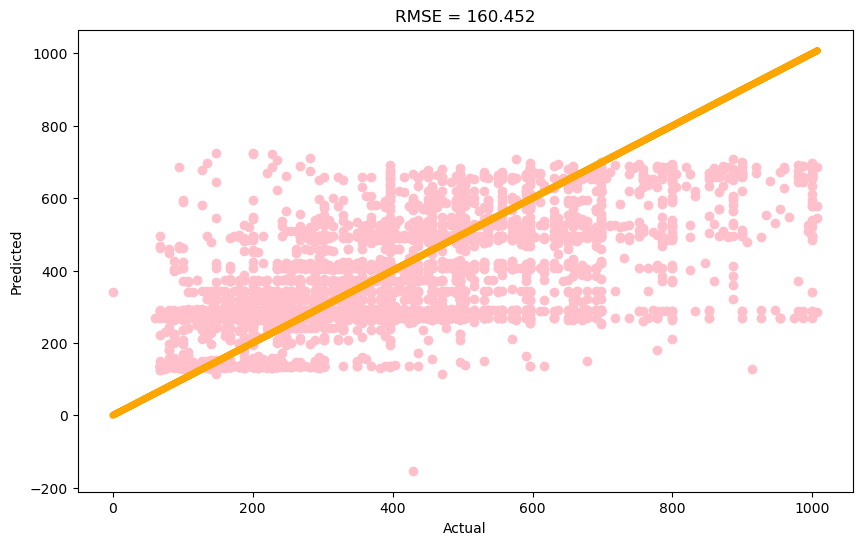

In [19]:
# plot RMSE with best model and best parameters
plt.figure(figsize=(10, 6))
plt.plot(ytest, y_predDNN, 'o', color='pink')
plt.plot(ytest, ytest, '-', color='orange', linewidth=5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
# plt.xlim(200, 600)
# plt.ylim(200, 600)
plt.title('RMSE = %.3f' % np.sqrt(mean_squared_error(ytest, y_predDNN)))
plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))
# plt.plot(ytest2, y_predDNN2, 'o', color='pink')
# plt.plot(ytest2, ytest2, '-', color='orange', linewidth=5)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# # plt.xlim(200, 600)
# # plt.ylim(200, 600)
# plt.title('RMSE = %.3f' % np.sqrt(mean_squared_error(ytest2, y_predDNN2)))
# plt.show()


# Compare models

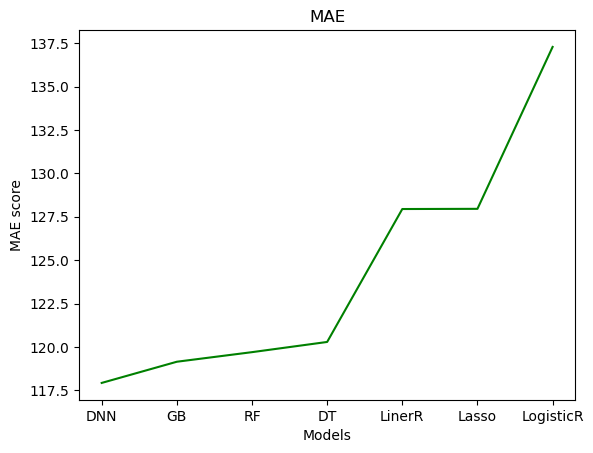

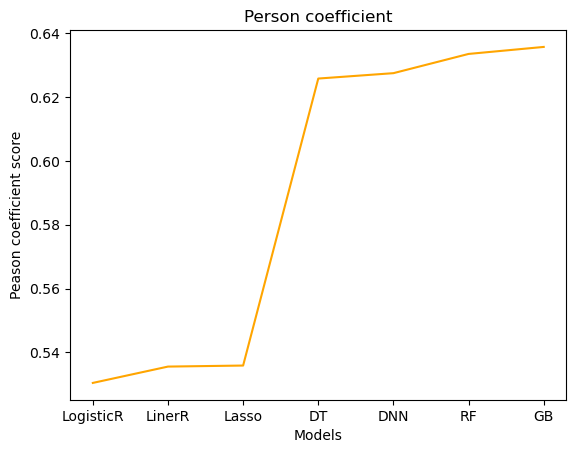

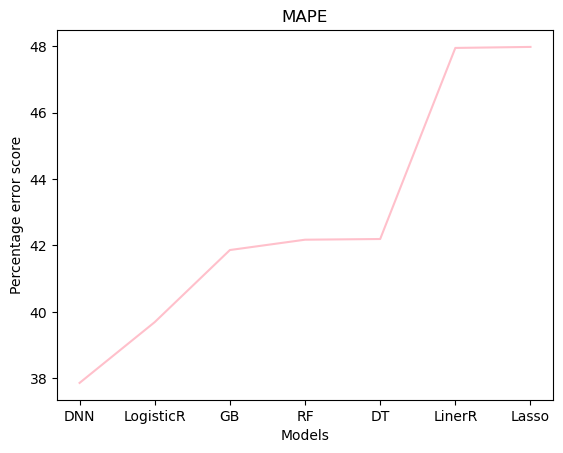

      Models      Corr       MAPE
0     LinerR  0.535519  47.953147
1  LogisticR  0.530397  39.688622
2         RF  0.633559  42.172799
3         DT  0.625839  42.193678
4         GB  0.635757  41.861235
5      Lasso  0.535845  47.983443
6        DNN  0.627528  37.856040


In [24]:
# create a dataframe to store the results and plot the results


# create a dataframe to store the results and plot the results
score = {'Models': ['LinerR', 'LogisticR', 'RF', 'DT', 'GB', 'Lasso', 'DNN'],
            'MSE': [mseLR1, mseLR2, mseRF, mseDT, mseGB, mseLasso, mseDNN],
            'R2': [r2LR1, r2LR2, r2RF, r2DT, r2GB, r2Lasso, r2DNN],
            'MAE': [maeLR1, maeLR2, maeRF, maeDT, maeGB, maeLasso, maeDNN],
            'RMSE': [rmseLR1, rmseLR2, rmseRF, rmseDT, rmseGB, rmseLasso, rmseDNN],
            'Corr': [corrLR1, corrLR2, corrRF, corrDT, corrGB, corrLasso, corrDNN],
            'MAPE': [mapeLR1, mapeLR2, mapeRF, mapeDT, mapeGB, mapeLasso, mapeDNN]}
plotscore = pd.DataFrame(score)
# print(plotscore)

# # MSE
# MSE_sort = plotscore.sort_values(by='MSE', ascending=True)
# MSE_sort.plot(x='Models', y='MSE', color='red', title='MSE')
# plt.show()

# # RMSE
# RMSE_sort = plotscore.sort_values(by='RMSE', ascending=True)
# RMSE_sort.plot(x='Models', y='RMSE', color='red', title='RMSE')
# plt.show()

# # R2
# R2_sort = plotscore.sort_values(by='R2', ascending=True)
# R2_sort.plot(x='Models', y='R2', color='red', title='R2')
# plt.show()

# # MAE
MAE_sort = plotscore.sort_values(by='MAE', ascending=True)
# MAE_sort.plot(x='Models', y='MAE', color='red', title='MAE')
# plt.show()

# # Corr
Corr_sort = plotscore.sort_values(by='Corr', ascending=True)
# Corr_sort.plot(x='Models', y='Corr', color='red', title='Corr')
# plt.show()

MAPE_sort = plotscore.sort_values(by='MAPE', ascending=True)

# fig, ax = plt.subplots(2, 3, figsize=(15, 10))
# ax[0, 0].plot(RMSE_sort['Models'], RMSE_sort['RMSE'], color='red')
# ax[0, 0].set_title('RMSE')
# ax[0, 1].plot(R2_sort['Models'], R2_sort['R2'], color='blue')
# ax[0, 1].set_title('R2')
# ax[1, 0].plot(MAE_sort['Models'], MAE_sort['MAE'], color='green')
# ax[1, 0].set_title('MAE')
# ax[1, 1].plot(Corr_sort['Models'], Corr_sort['Corr'], color='orange')
# ax[1, 1].set_title('Corr')
# ax[0, 2].plot(MAPE_sort['Models'], MAPE_sort['MAPE'], color='pink')
# ax[0, 2].set_title('MAPE')
# plt.show()

# plt.plot(RMSE_sort['Models'], RMSE_sort['RMSE'], color='red')
# plt.title('RMSE')
# plt.xlabel('Models')
# plt.ylabel('RMSE score')
# plt.show()

# plt.plot(R2_sort['Models'], R2_sort['R2'], color='blue')
# plt.title('R2')
# plt.show()

plt.plot(MAE_sort['Models'], MAE_sort['MAE'], color='green')
plt.title('MAE')
plt.xlabel('Models')
plt.ylabel('MAE score')
plt.show()

plt.plot(Corr_sort['Models'], Corr_sort['Corr'], color='orange')
plt.title('Person coefficient')
plt.xlabel('Models')
plt.ylabel('Peason coefficient score')
plt.show()

plt.plot(MAPE_sort['Models'], MAPE_sort['MAPE'], color='pink')
plt.title('MAPE')
plt.xlabel('Models')
plt.ylabel('Percentage error score')
plt.show()


print(plotscore.iloc[:, [0, -2, -1]])


